# Reading, cleaning and plotting data from Spectrum Analyzer: 2018-10-04

Here we will open and see what the data from the spectrum analyzer looks like, whether we need to clean it and if so, conduct that cleaning process.

In [1]:
# First import the necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
# Then load the data as a dataframe:
df_01 = pd.read_csv('2018-10-04-Plasma_Chamber_results/0210201801.csv',header=None)    # First .csv file in folder

In [3]:
df_01.head(10)

,0,1,2,3,4
0,Trace1,NaN,NaN,NaN,NaN
1,Freq,NaN,Amp,NaN,NaN
2,0,Hz,-24.25,dBm,NaN
3,83333,Hz,-24.22,dBm,NaN
4,166666,Hz,-24.23,dBm,NaN
5,249999,Hz,-24.30,dBm,NaN
6,333332,Hz,-24.50,dBm,NaN
7,416665,Hz,-24.88,dBm,NaN
8,499998,Hz,-25.59,dBm,NaN
9,583331,Hz,-26.75,dBm,NaN


We can drop the first two rows:

In [4]:
df_01 = df_01.drop(df_01.index[[0,1]])
df_01.head(5)

,0,1,2,3,4
2,0,Hz,-24.25,dBm,NaN
3,83333,Hz,-24.22,dBm,NaN
4,166666,Hz,-24.23,dBm,NaN
5,249999,Hz,-24.30,dBm,NaN
6,333332,Hz,-24.50,dBm,NaN


We are only interested in columns '0' and '2', therefore we can get keep those:

In [5]:
df_01 = df_01[[0,2]]
df_01.head(5)

,0,2
2,0,-24.25
3,83333,-24.22
4,166666,-24.23
5,249999,-24.30
6,333332,-24.50


Let's label them 'x' and 'y':

In [6]:
df_01.columns = ['x','y']
df_01.head(5)

,x,y
2,0,-24.25
3,83333,-24.22
4,166666,-24.23
5,249999,-24.30
6,333332,-24.50


Unfortunately the values have been interpreted as strings, and therefore we will need to convert this to float:

In [7]:
df_01.y.head(5)

2                  -24.25
3                  -24.22
4                  -24.23
5                  -24.30
6                  -24.50
Name: y, dtype: object

In [8]:
df_01.x.head(5)

2                       0
3                   83333
4                  166666
5                  249999
6                  333332
Name: x, dtype: object

In [9]:
df_01 = df_01.apply(pd.to_numeric,errors='coerce',downcast='float')
print(df_01.x.tail(5))
print(df_01.y.tail(5))

598    49666468.0
599    49749800.0
600    49833136.0
601    49916468.0
602    49999800.0
Name: x, dtype: float32
598   -74.459999
599   -72.570000
600   -73.470001
601   -73.610001
602   -73.599998
Name: y, dtype: float32


Also, with such large numbers for the x-axis it is best to convert this to MHz: 

In [10]:
df_01.x = df_01.x/1e6

Assuming all the other .csv files are in this format we can write up a function that does the steps above automatically and outputs a DataFrame for us to use:

In [11]:
def clean_spec_data(f_name):
    df = pd.read_csv(f_name,header=None)
    df = df.drop(df.index[[0,1]])
    df = df[[0,2]]
    df.columns = ['x','y']
    # Ensure all values are numeric not strings
    df = df.apply(pd.to_numeric, errors='coerce',downcast='float')
    # Convert to MHz
    df.x = df.x/1e6
    return df

We can define a function for plotting the data with associated peaks as well:

In [12]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.style.use('ggplot')
plt.rc('font', **font)

def peak_plot(df,peak_prom,fig_len,fig_h,colr,mk_colr,pk_txt_x,x_gap,pk_txt_y,y_gap,plt_label,x_label,y_label):
    peaks, _= find_peaks(df.y,prominence=peak_prom)
    fig = plt.figure(figsize=(fig_len,fig_h))
    ax = plt.gca()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.plot(df.x,df.y,colr)
    # Due to the cleaning process, the names of the rows are no longer the same as the index value (row df.index[0] = 2)
    plt.plot(df.x[df.index[peaks]], df.y[df.index[peaks]], "x",color=mk_colr)
    plt.text(s='Peaks:',x=pk_txt_x,y=pk_txt_y)
    A = [round(x,2) for x in df.x[df.index[peaks]].values]
    B = [round(y,2) for y in df.y[df.index[peaks]].values]
    peak_tups = list(zip(A,B))
    for i in range(len(peak_tups)):
        plt.annotate('{}'.format(peak_tups[i]), 
                     xy=peak_tups[i], 
                     xytext = (pk_txt_x+x_gap,pk_txt_y-i*y_gap) , 
                     xycoords = 'data', 
                     textcoords='data')
    ax.legend([plt_label])
    plt.show()
    return fig

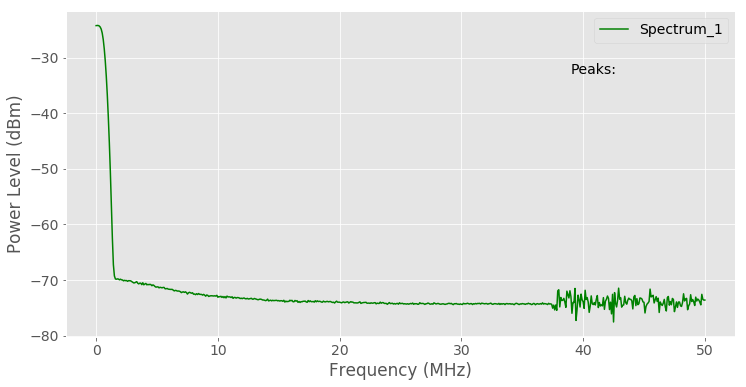

In [13]:
# Now lets plot df_01:
F1 = peak_plot(df_01,6,12,6,"g",'m',39,4,-33,3,'Spectrum_1','Frequency (MHz)','Power Level (dBm)')

Looks Let's look at some other files:

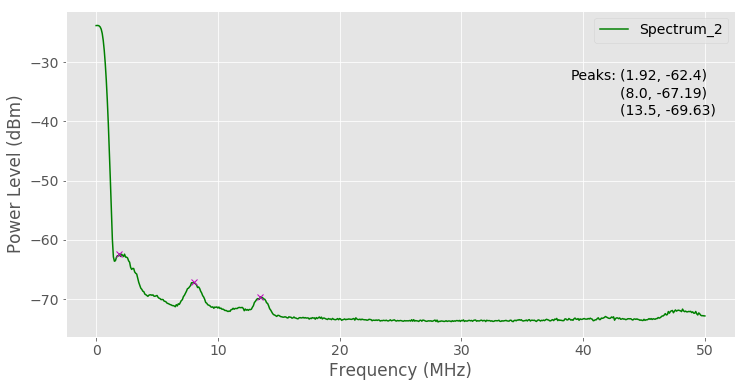

In [14]:
df_02 = clean_spec_data('2018-10-04-Plasma_Chamber_results/0210201802.csv')
F2 = peak_plot(df_02,1.2,12,6,"g",'m',39,4,-33,3,'Spectrum_2','Frequency (MHz)','Power Level (dBm)')

And the next one:

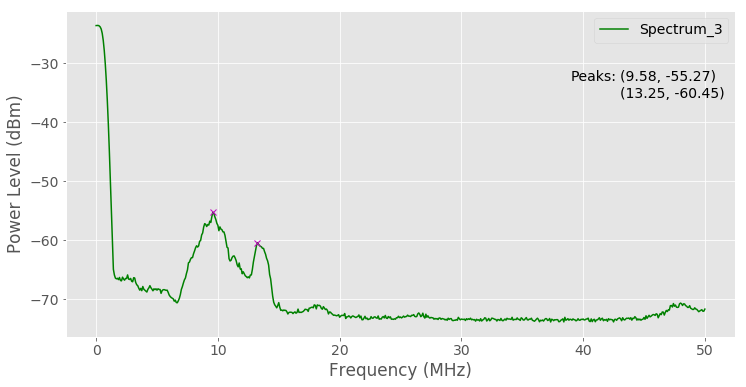

In [15]:
df_03 = clean_spec_data('2018-10-04-Plasma_Chamber_results/0210201803.csv')
F3 = peak_plot(df_03,2,12,6,"g",'m',39,4,-33,3,'Spectrum_3','Frequency (MHz)','Power Level (dBm)')

Last one for good measure:

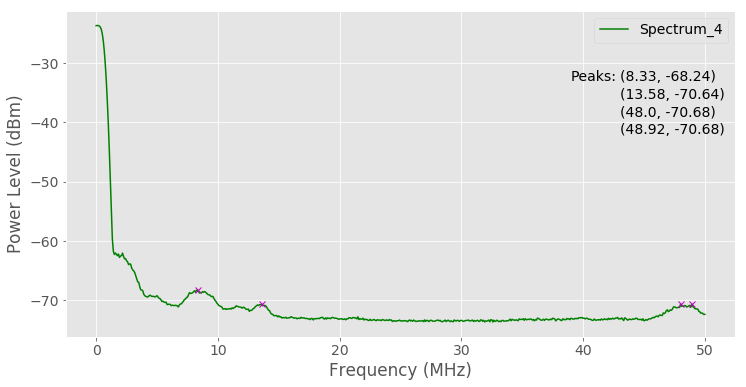

In [16]:
df_04 = clean_spec_data('2018-10-04-Plasma_Chamber_results/0210201804.csv')
F4 = peak_plot(df_04,1,12,6,"g",'m',39,4,-33,3,'Spectrum_4','Frequency (MHz)','Power Level (dBm)')

Therefore we can see that the functions introduced here can be used to read the .csv files, clean them to extract only the frequency and Power Level data and then plot them and identify the peaks.

You can save the figures by using the following:

In [17]:
# To save figure F4 as an .eps file then we would write:
# F4.savefig('Power_Spec_Background_0-50MHz.eps')
# where you remove the comment '#' symbol from the line above.